# A Toy Model to Look at the Distribution of Stock Closes

Let's warm up with a duplicate analysis of skew vs. effect on future closing. I've downloaded a dataset with one year (August 2009 to August 2010) of S+P500 data. All that I have found online are daily opens, closes, highs, lows, and volumes.

We can purchase by the minute data to do a better analysis. I'd like to partially repeat the work that your previous summer student did so that I can understand where the areas of improvement are.

Import the necessary packages:

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

In [162]:
d = pd.read_csv('sp500hst.txt')
d[242:252] #show the dataframe as an example

,Date,Ticker,Open,High,Low,Close,Volume
242,20100817,A,28.87,29.53,28.42,29.28,73050
243,20100819,A,29.25,29.26,28.22,28.54,33832
244,20100820,A,28.26,28.66,27.99,28.56,33738
245,20090821,AA,12.64,12.73,12.49,12.56,338295
246,20090824,AA,12.76,12.83,12.36,12.42,307627
247,20090825,AA,12.57,12.66,12.30,12.35,246836
248,20090826,AA,12.28,12.47,12.11,12.26,286577
249,20090827,AA,12.23,12.49,12.02,12.40,265027
250,20090828,AA,12.66,12.77,12.40,12.50,203405
251,20090831,AA,12.20,12.24,12.03,12.05,227035


In [164]:
#make a range parameter:
d['Range'] = d['High'] - d['Low']
d['Norm_Range'] = d['Range']/d['Close'] #create a range parameter that is normalized to th closing price.
#d['Norm_Volume'] = d.groupby('Ticker').transform(lambda x: x/x.mean())

#shift to find the nextday volume
#d['Next_Day_Volume'] = d['Volume'].shift(-1)
#d.dropna(inplace = True) #drop the last day, since we don't have any dta for it

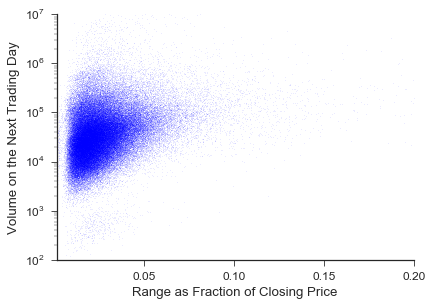

In [166]:
plt.scatter(d['Norm_Range'], d['Volume'], lw = 0, s = 1, alpha = 0.1)
plt.xlim(0.001,0.2)
plt.ylim(1E2, 1E7)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Range as Fraction of Closing Price')
plt.ylabel('Volume on the Next Trading Day')
sns.despine()

In [167]:
g = d.groupby(by = 'Ticker') #dataset grouped by stock
g.describe()[:10] #print descriptions so that we can see how the data is grouped

Close             Date        High         Low  Norm_Range  \
Ticker                                                                          
A      count  245.000000       245.000000  245.000000  245.000000  245.000000   
       mean    30.246143  20097153.657143   30.567838   29.866467    0.023290   
       std      2.815172      4503.703862    2.821827    2.789087    0.012490   
       min     25.220000  20090821.000000   25.540000   24.960000    0.006264   
       25%     28.270000  20091125.000000   28.660000   27.780000    0.015048   
       50%     29.640000  20100225.000000   29.940000   29.350000    0.020206   
       75%     32.220000  20100524.000000   32.540000   31.790000    0.030174   
       max     37.230000  20100820.000000   37.430000   36.855000    0.125000   
AA     count  245.000000       245.000000  245.000000  245.000000  245.000000   
       mean    13.047345  20097153.657143   13.275341   12.842954    0.033338   

                    Open       Range         Volume  
Ticker                                               
A      count  245.000000  245.000000     245.000000  
       mean    30.234857    0.701371   35140.146939  
       std      2.808452    0.390548   14095.293623  
       min     25.320000    0.180000    7567.000000  
       25%     28.250000    0.440000   26405.000000  
       50%     29.680000    0.610000   33094.000000  
       75%     32.090000    0.890000   41712.000000  
       max     37.250000    4.160000  118162.000000  
AA     count  245.000000  245.000000     245.000000  
       mean    13.086959    0.432387  334281.624490

In [168]:
#make a helper function to get the moments
def GetMoments(data):
    #import scipy
    _, _, mean, variance, skewness, kurtosis = scipy.stats.describe(data)
    
    return mean, variance, skewness, kurtosis

In [171]:
#apply the moments function and make a new dataframe of stats, by stock:

desc = pd.DataFrame(g['Close'].apply(lambda c: pd.Series(scipy.stats.describe(c))))
st = desc.unstack(level= 0).T #unpack and transpose the intermediate dataframe
st.rename(columns = {0: 'n_days', 1: 'min_max', 2: 'mean', 3: 'variance', 4:'skewness', 5:'kurtosis'}, inplace = True)
st.dropna(inplace = True)

st.head()

n_days            min_max     mean variance   skewness  kurtosis
  Ticker                                                                 
0 A         245     (25.22, 37.23)  30.2461  7.92519   0.445463 -0.504739
  AA        245      (10.0, 17.45)  13.0473  2.43167   0.176078 -0.341031
  AAPL      241  (165.18, 274.074)  221.125  931.874  0.0708043  -1.31679
  ABC       245      (20.8, 32.88)  27.4293  12.0999  -0.348527  -1.05977
  ABT       245      (45.0, 56.24)  50.9865  9.41271  -0.235591  -1.32241

In [178]:
st.get_level_values

AttributeError: 'DataFrame' object has no attribute 'get_level_values'

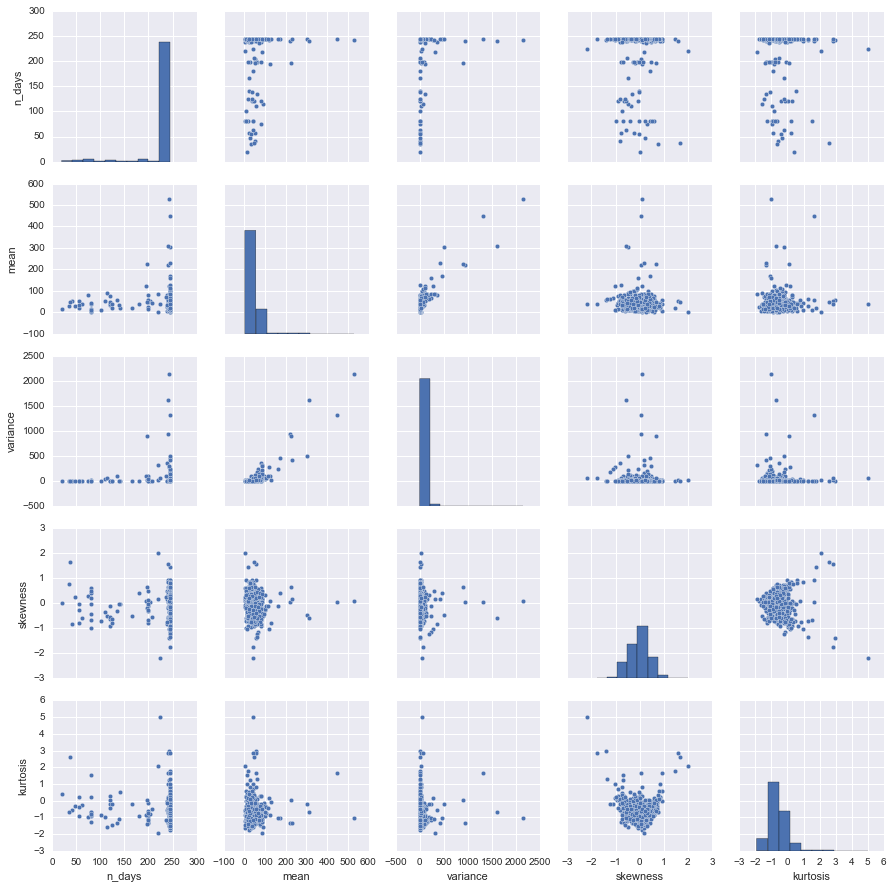

In [103]:
sns.pairplot(st)